23:39:20 - cmdstanpy - INFO - Chain [1] start processing
23:39:20 - cmdstanpy - INFO - Chain [1] done processing


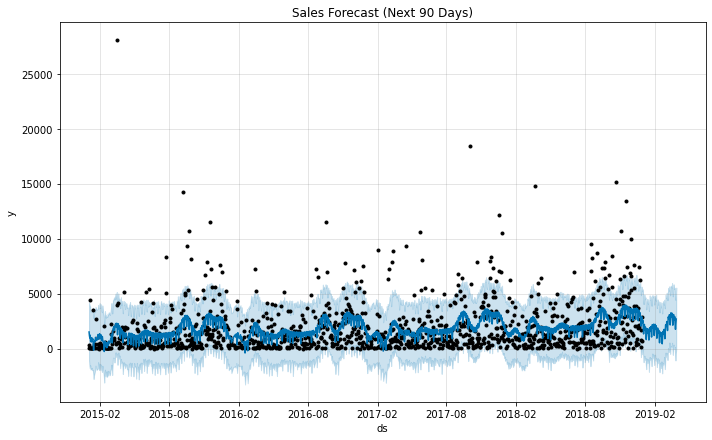

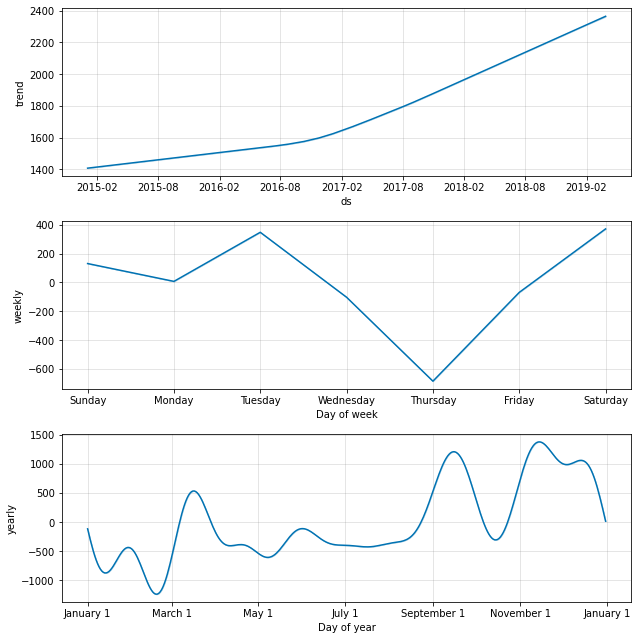

In [1]:
# modeling_forecasting.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load cleaned data
df = pd.read_csv("/Users/Keswickb/Desktop/retail-sales-dashboard/data/processed/retail_sales_clean.csv", parse_dates=['order_date'])

# Aggregate daily sales
daily_sales = df.groupby("order_date")["sales"].sum().reset_index()

# Prophet requires columns: ds (date), y (target)
forecast_df = daily_sales.rename(columns={"order_date": "ds", "sales": "y"})

# Build model
model = Prophet()
model.fit(forecast_df)

# Forecast next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Sales Forecast (Next 90 Days)")
plt.show()

# Plot forecast components
model.plot_components(forecast)
plt.show()
